In [2]:
from skn.query import Query
from skn.CAN.fields.channels import *
from skn.CAN.tags.tags import *

# result = Query().all_tags(Log_id.CAN_2022_08_20_190944).channels(VCU.INS.VX).execute()
# result.plot_line()
# result.show()

In [3]:
# Import all the necessary libraries for the notebook
import matplotlib.pyplot as plt
%matplotlib widget

import pandas as pd
import numpy as np

from skn.query import Query

import sys

from skn import utils
from skn.query import Query
from skn.plotting_service import PlottingService
from skn.simple_plotter import SimplePlotter

from skn.CAN.fields.channels import *
from skn.CAN.tags.tags import *

In [4]:
# Display/Locate logs
Query().all_tags( Car.VEGA, Event.ENDURANCE).print_logs()

log_id:      CAN_2025_05_10_125333
car:         Vega
comment:     Failed. Inboard suspension broke
driver:      Guro
event:       Endurance
location:    Dragvoll
log_name:    Ramp-up pre endurance attempt - fail
log_type:    TEST_DRIVE


log_id:      CAN_2025_05_24_152529
car:         Vega
comment:     Endurance stint attempt. Stopped at round ~8. Packet-loss issues. Bodyslip and cA
driver:      David
event:       Endurance
location:    Dragvoll
log_name:    Endurance stint attempt - David
log_type:    TEST_DRIVE


log_id:      CAN_2025_05_25_172200
car:         Vega
comment:     Stopped because cell voltage below 3.3
driver:      Fredrik Gravem
event:       Endurance
location:    Dragvoll
log_name:    stint2_endurance_fred
log_type:    TEST_DRIVE


log_id:      CAN_2025_05_31_125907
car:         Vega
comment:     Wet track. cA, 60kW power lim +KERS lim. 17k RPM limit. Guro stint 1, Stian stint 2.
driver:      Guro
event:       Endurance
location:    Dragvoll
log_name:    Endurance ful

In [5]:
import re

log_text = """
log_id:      CAN_2025_05_10_125333
car:         Vega
comment:     Failed. Inboard suspension broke
driver:      Guro
event:       Endurance
location:    Dragvoll
log_name:    Ramp-up pre endurance attempt - fail
log_type:    TEST_DRIVE

log_id:      CAN_2025_05_10_130000_test
car:         Vega   
comment:     Ramp-up pre endurance attempt. 1st stint. 60kW power limit + KERS limit. 17k RPM limit.
driver:      Guro
event:       Endurance
location:    Dragvoll
log_name:    Ramp-up pre endurance attempt - Guro
log_type:    TEST_DRIVE


log_id:      CAN_2025_05_24_152529
car:         Vega
comment:     Endurance stint attempt. Stopped at round ~8. Packet-loss issues. Bodyslip and cA
driver:      David
event:       Endurance
location:    Dragvoll
log_name:    Endurance stint attempt - David
log_type:    TEST_DRIVE


log_id:      CAN_2025_05_25_172200
car:         Vega
comment:     Stopped because cell voltage below 3.3
driver:      Fredrik Gravem
event:       Endurance
location:    Dragvoll
log_name:    stint2_endurance_fred
log_type:    TEST_DRIVE


log_id:      CAN_2025_05_31_125907
car:         Vega
comment:     Wet track. cA, 60kW power lim +KERS lim. 17k RPM limit. Guro stint 1, Stian stint 2.
driver:      Guro
event:       Endurance
location:    Dragvoll
log_name:    Endurance full - Guro/Stian
log_type:    TEST_DRIVE


log_id:      CAN_2025_06_07_231326
car:         Vega
comment:     First sting Guro
driver:      Guro
event:       Endurance
location:    Dragvoll
log_name:    first_stint
log_type:    TEST_DRIVE


log_id:      CAN_2025_06_07_232636
car:         Vega
comment:     Second stint Stian driver
driver:      Stian Persson Lie
event:       Endurance
location:    Dragvoll
log_name:    Second_stint_endurance
log_type:    COMPETITION_DRIVE


log_id:      CAN_2025_06_14_173642
car:         Vega
comment:     Guro and Stian. Accu voltage was very low in the end. Sunny, 25 deg ambient
driver:      Guro
event:       Endurance
location:    Dragvoll
log_name:    full_endurance_dragvoll
log_type:    TEST_DRIVE


log_id:      CAN_2025_06_15_165500
car:         Vega
comment:     First stint. Guro. Focus on coasting when driving. 25 deg ambient.
driver:      Guro
event:       Endurance
location:    Dragvoll
log_name:    full_endurance_stint1
log_type:    TEST_DRIVE


log_id:      CAN_2025_06_15_165601
car:         Vega
comment:     Second stint. 24 deg ambient. Pressure reduced to 0.65 bar.
driver:      Stian Persson Lie
event:       Endurance
location:    Dragvoll
log_name:    full_endurance_stint2
log_type:    TEST_DRIVE


log_id:      CAN_2025_06_22_230958
car:         Vega
comment:     UDP dump. Barely drove. Car toggles, continues driving. Cancel. PCU dead
driver:      Guro
event:       Endurance
location:    Lånkebanen
log_name:    Endurance attempt - failure
log_type:    TEST_DRIVE


log_id:      CAN_2025_06_25_035618
car:         Vega
comment:     Endurance at lånke. 24.06
driver:      Guro
event:       Endurance
location:    Lånkebanen
log_name:    Endurance_Stint_1
log_type:    TEST_DRIVE
"""  # (Replace with your full output)

logs = {}
current_log_id = None
current_log = {}

for line in log_text.strip().splitlines():
    line = line.strip()
    if not line:
        # Blank line indicates end of one log block
        if current_log_id:
            logs[current_log_id] = current_log
        current_log_id = None
        current_log = {}
    else:
        if line.startswith("log_id:"):
            current_log_id = line.split(":")[1].strip()
        else:
            key, value = line.split(":", 1)
            current_log[key.strip()] = value.strip()

# Catch the last log (if no trailing blank line)
if current_log_id and current_log_id not in logs:
    logs[current_log_id] = current_log

# --- Result ---
print(logs)

{'CAN_2025_05_10_125333': {'car': 'Vega', 'comment': 'Failed. Inboard suspension broke', 'driver': 'Guro', 'event': 'Endurance', 'location': 'Dragvoll', 'log_name': 'Ramp-up pre endurance attempt - fail', 'log_type': 'TEST_DRIVE'}, 'CAN_2025_05_10_130000_test': {'car': 'Vega', 'comment': 'Ramp-up pre endurance attempt. 1st stint. 60kW power limit + KERS limit. 17k RPM limit.', 'driver': 'Guro', 'event': 'Endurance', 'location': 'Dragvoll', 'log_name': 'Ramp-up pre endurance attempt - Guro', 'log_type': 'TEST_DRIVE'}, 'CAN_2025_05_24_152529': {'car': 'Vega', 'comment': 'Endurance stint attempt. Stopped at round ~8. Packet-loss issues. Bodyslip and cA', 'driver': 'David', 'event': 'Endurance', 'location': 'Dragvoll', 'log_name': 'Endurance stint attempt - David', 'log_type': 'TEST_DRIVE'}, 'CAN_2025_05_25_172200': {'car': 'Vega', 'comment': 'Stopped because cell voltage below 3.3', 'driver': 'Fredrik Gravem', 'event': 'Endurance', 'location': 'Dragvoll', 'log_name': 'stint2_endurance_fre

import power data  

In [6]:

results = {}

for log_id in logs.keys():
    if not log_id in Log_id.__members__:
        print(f"Skipping invalid log_id: {log_id}", "Log_name:", logs[log_id].get('log_name', 'N/A'))
        invalid_log_ids = invalid_log_ids if 'invalid_log_ids' in locals() else []
        invalid_log_ids.append(log_id)
        continue
    results[log_id] = Query().all_tags(getattr(Log_id, log_id)).channels(AMS.TSDATA.POWER).execute()
    print(f"Processed log_id: {log_id}", "Log_name:", logs[log_id].get('log_name', 'N/A'))
# Display the results
if 'invalid_log_ids' in locals():
    for log_id in invalid_log_ids:
        del logs[log_id]
        print(f"Removed invalid log_id: {log_id}")


Processed log_id: CAN_2025_05_10_125333 Log_name: Ramp-up pre endurance attempt - fail
Skipping invalid log_id: CAN_2025_05_10_130000_test Log_name: Ramp-up pre endurance attempt - Guro
Processed log_id: CAN_2025_05_24_152529 Log_name: Endurance stint attempt - David
Processed log_id: CAN_2025_05_25_172200 Log_name: stint2_endurance_fred
Processed log_id: CAN_2025_05_31_125907 Log_name: Endurance full - Guro/Stian
Processed log_id: CAN_2025_06_07_231326 Log_name: first_stint
Processed log_id: CAN_2025_06_07_232636 Log_name: Second_stint_endurance
Processed log_id: CAN_2025_06_14_173642 Log_name: full_endurance_dragvoll
Processed log_id: CAN_2025_06_15_165500 Log_name: full_endurance_stint1
Processed log_id: CAN_2025_06_15_165601 Log_name: full_endurance_stint2
Skipping invalid log_id: CAN_2025_06_22_230958 Log_name: Endurance attempt - failure
Skipping invalid log_id: CAN_2025_06_25_035618 Log_name: Endurance_Stint_1
Removed invalid log_id: CAN_2025_05_10_130000_test
Removed invalid lo

In [7]:
for log_id in logs.keys():
    if log_id not in results:
        print(f"No results for log_id: {log_id}")
        continue
    globals()[f"run_{log_id}"] = results[log_id].to_numpy_arrays()




In [8]:
print(len(run_CAN_2025_05_10_125333['TSData_power']), len(run_CAN_2025_05_10_125333['time'] ))

33790 33790


In [9]:
def calculate_energy(power, dt):
    """
    Integrate power over time to get energy.
    :param power: Power in Watts
    :param dt: Time step in seconds
    :return: Energy in Joules
    """
    convert_to_kWh = 1 / (3600 * 1000)  # Convert Joules to kWh
    mask_used = power > 0  # Only consider positive power values
    mask_kers = power < 0  # Only consider negative power values (KERS)
    KERS = np.trapz(power[mask_kers], x=dt[mask_kers]) * convert_to_kWh
    used = np.trapz(power[mask_used], x=dt[mask_used]) * convert_to_kWh
    return used, KERS, KERS + used , np.average(abs(power)) 



In [10]:
energy_results = {}

for log_id, run in [(k, globals()[f"run_{k}"]) for k in logs.keys()]:
    if log_id not in results:
        print(f"No data for log_id: {log_id}")
        continue
    used, kers, total, average = calculate_energy(run['TSData_power'], run['time'])
    energy_results[log_id] = {'used_kWh': used, 'kers_kWh': kers, 'total_kWh': total, 'average_W': average}

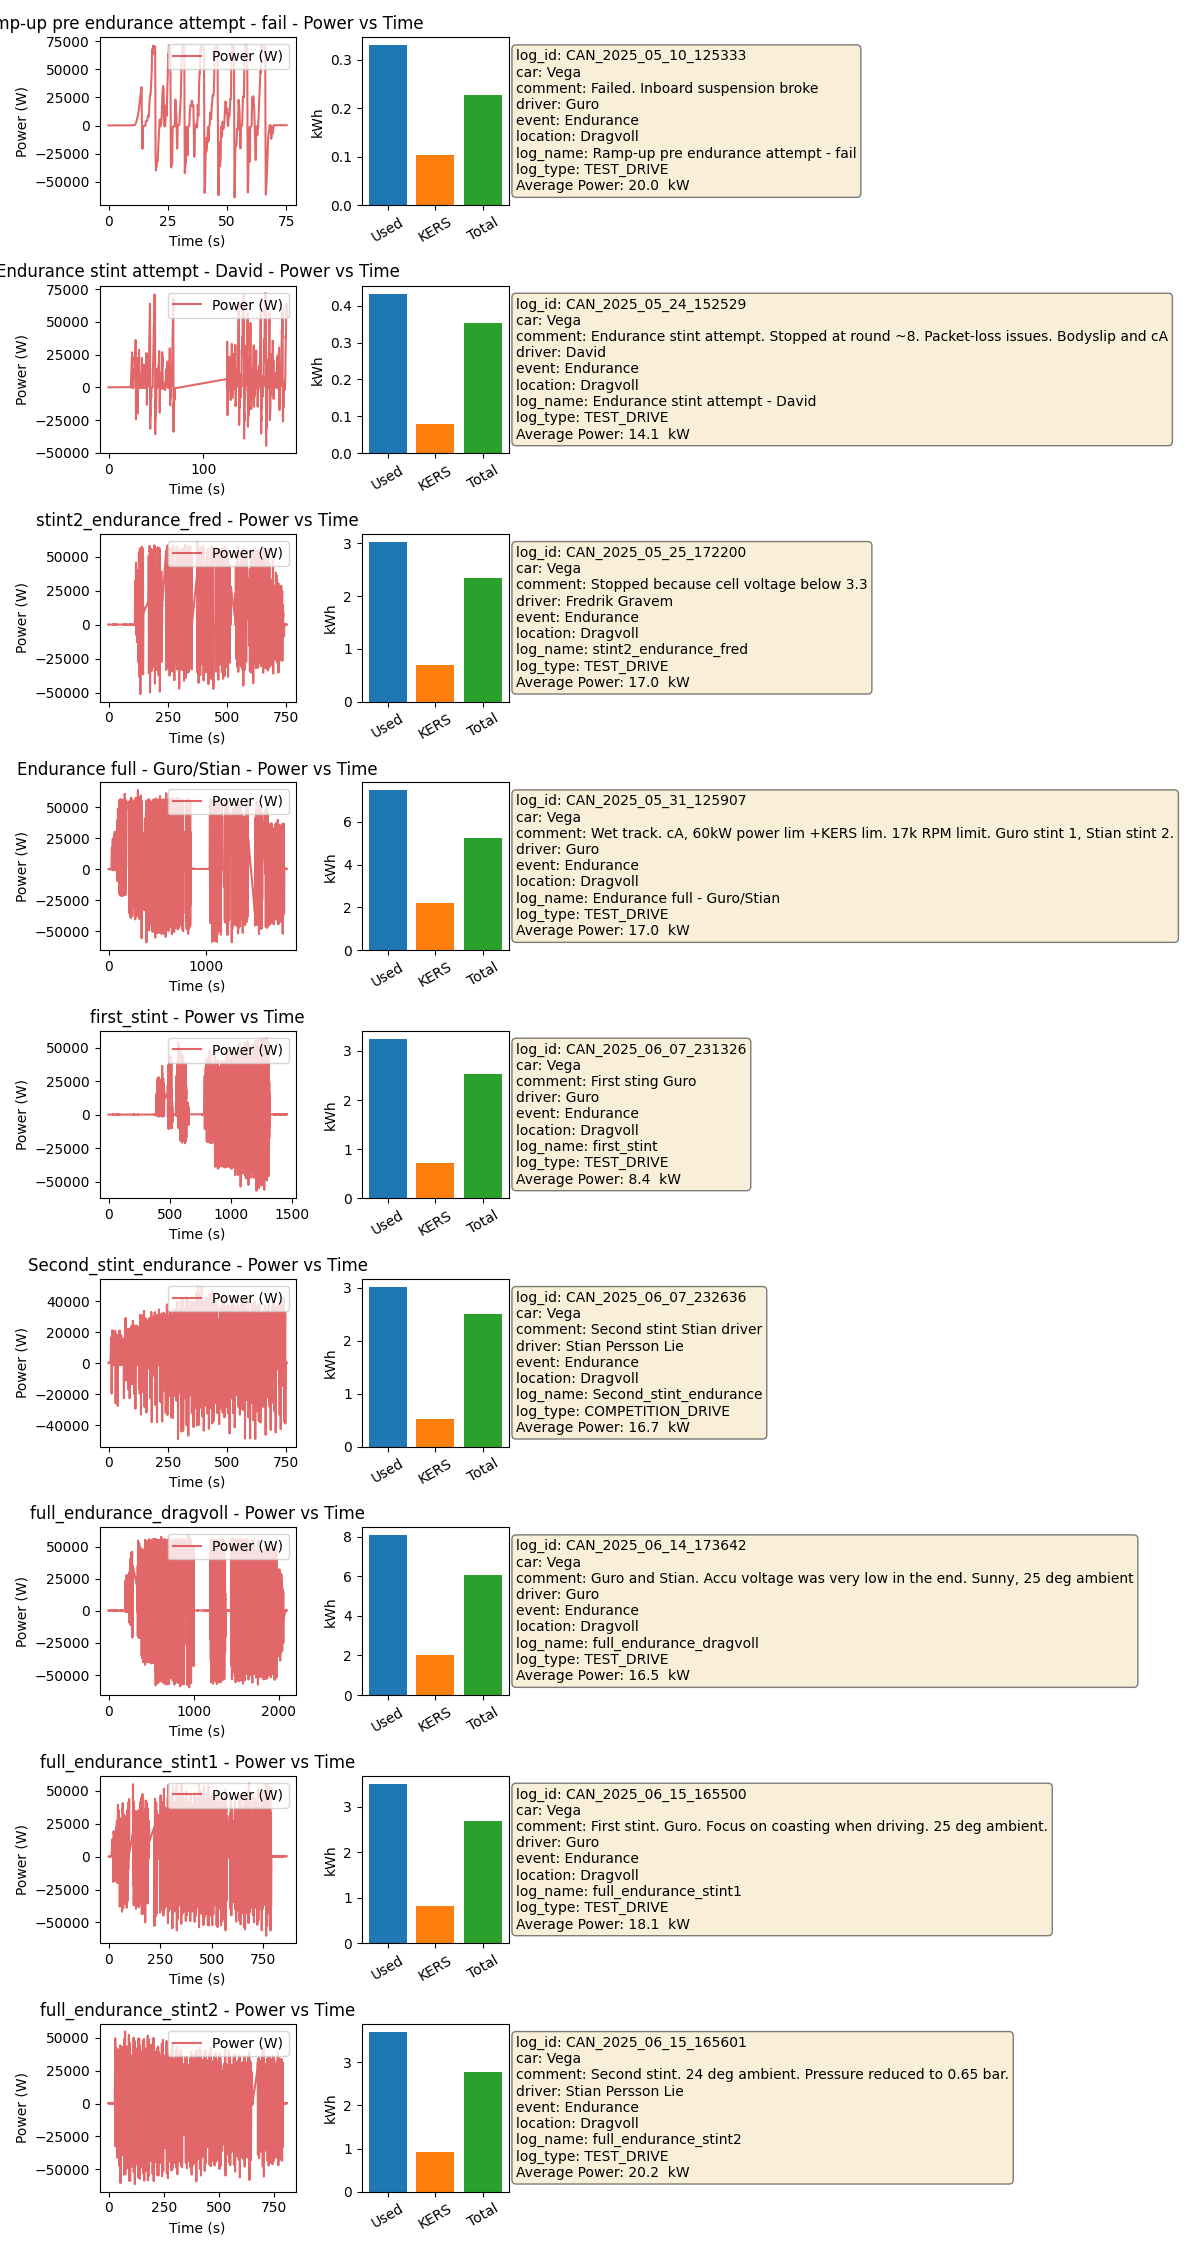

In [11]:
from matplotlib.gridspec import GridSpec

labels = list(energy_results.keys())

fig, axs = plt.subplots(len(labels), 1, figsize=(12, 2.5 * len(labels)))
if len(labels) == 1:
    axs = [axs]



for i, log_id in enumerate(energy_results.keys()):
    used = energy_results[log_id]['used_kWh']
    kers = abs(energy_results[log_id]['kers_kWh'])  # Make KERS absolute
    total = energy_results[log_id]['total_kWh']
    average_W = energy_results[log_id]['average_W']

    # Only create the GridSpec and new axes on the first iteration
    if i == 0:
        fig.clf()
        # Increase width for bar plot (e.g., 2:1 ratio)
        gs = GridSpec(len(labels), 2, width_ratios=[2, 1.5], figure=fig)
        axs_power = []
        axs_bar = []
        for row in range(len(labels)):
            axs_power.append(fig.add_subplot(gs[row, 0]))
            axs_bar.append(fig.add_subplot(gs[row, 1]))
    ax_power = axs_power[i]
    ax_bar = axs_bar[i]

    # Power vs time
    run = globals()[f"run_{log_id}"]
    ax_power.plot(run['time'], run['TSData_power'], color='tab:red', alpha=0.7, label='Power (W)')
    ax_power.set_ylabel('Power (W)')
    ax_power.set_xlabel('Time (s)')
    ax_power.set_title(f"{logs[log_id]['log_name']} - Power vs Time")
    ax_power.legend(loc='upper right')

    # Bar plot for energy
    ax_bar.bar(['Used', 'KERS', 'Total'], [used, kers, total], color=['tab:blue', 'tab:orange', 'tab:green'])
    ax_bar.set_ylabel('kWh')
    ax_bar.autoscale(enable=True, axis='y')  # Autoscale y-axis
    # Display log info as text box, include log_id
    log_info = f"log_id: {log_id}\n" + "\n".join([f"{k}: {v}" for k, v in logs[log_id].items()]) + "\n" f"Average Power: {round(average_W/1000,1)}  kW"
    ax_bar.text(1.05, 0.5, log_info, transform=ax_bar.transAxes, fontsize=10,
                verticalalignment='center', bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.5))
    ax_bar.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()
